In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

import seaborn as sb

Значения переменных yes/no заранее заменил на 1и0 

In [80]:
data = pd.read_excel("dataset.xlsx")

In [81]:
data.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
5,42,management,single,tertiary,0,0,1,1,unknown,5,may,562,2,-1,0,unknown,1


In [67]:
data.shape

(11162, 17)

In [68]:
data.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit       int64
dtype: object

In [69]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [42]:
data.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,0.015051,1528.538524,0.473123,0.130801,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,0.121761,3225.413326,0.499299,0.337198,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,122.000000,0.000000,0.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,550.000000,0.000000,0.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1708.000000,1.000000,0.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [43]:
data.describe(include='object')

,job,marital,education,contact,month,poutcome
count,11162,11162,11162,11162,11162,11162
unique,12,3,4,3,12,4
top,management,married,secondary,cellular,may,unknown
freq,2566,6351,5476,8042,2824,8326


In [44]:
corr = data.corr() # строим матрицу корреляций

corr.style.background_gradient(cmap='coolwarm')

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
age,1.000000,-0.011425,0.112300,-0.168700,-0.031418,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
default,-0.011425,1.000000,-0.060954,0.011076,0.076434,0.017342,-0.009760,0.030975,-0.036282,-0.035273,-0.040680
balance,0.112300,-0.060954,1.000000,-0.077092,-0.084589,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
housing,-0.168700,0.011076,-0.077092,1.000000,0.076761,-0.014770,0.035051,0.006660,0.064497,-0.000840,-0.203888
loan,-0.031418,0.076434,-0.084589,0.076761,1.000000,0.017269,-0.001914,0.034722,-0.030416,-0.022668,-0.110580
day,-0.000762,0.017342,0.010467,-0.014770,0.017269,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,-0.009760,0.022436,0.035051,-0.001914,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.005278,0.030975,-0.013894,0.006660,0.034722,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.002774,-0.036282,0.017411,0.064497,-0.030416,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
previous,0.020169,-0.035273,0.030805,-0.000840,-0.022668,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867


Этап моделирования 

In [83]:
X = data.drop('deposit', axis=1) # матрица объект-признак
y = data['deposit'] # целевая переменная

In [84]:
X = X.drop(['job','marital','education','contact','month','poutcome'], axis=1)

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(Xtrain)

Xtrain = pd.DataFrame(ss.transform(Xtrain), columns=X.columns)
Xtest = pd.DataFrame(ss.transform(Xtest), columns=X.columns)

Xtrain.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
0,1.581951,-0.122118,2.083507,1.059464,2.545739,0.284318,-0.785527,1.662174,-0.474357,-0.365571
1,0.823300,8.188828,-0.500178,1.059464,-0.392813,-0.545702,-0.258692,-0.183877,1.979568,2.348973
2,-1.115476,8.188828,-0.812078,1.059464,-0.392813,-1.138573,0.982105,-0.183877,-0.474357,-0.365571
3,-0.946887,-0.122118,0.925652,1.059464,-0.392813,0.640040,0.561789,0.554543,-0.474357,-0.365571
4,-0.862592,-0.122118,0.321128,-0.943873,-0.392813,-0.071405,-0.342179,-0.553088,1.225928,0.991701


In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # объявление модели
model.fit(Xtrain, ytrain) # обучение модели

LogisticRegression()

In [50]:
pred_test = model.predict(Xtest) # предсказание классов

In [51]:
pred_test

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [52]:
accuracy_score(ytest, pred_test)

0.7674668577570763

array([[1168,  282],
       [ 367,  974]], dtype=int64)

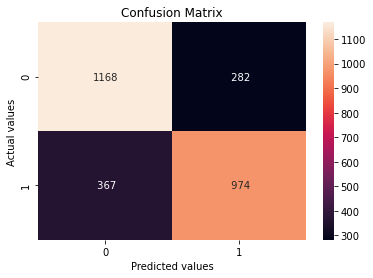

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sb


conf_mx = confusion_matrix(ytest, pred_test)
sb.heatmap(conf_mx,annot=True,fmt='4.0f')
plt.title('Confusion Matrix', size = 12)
plt.xlabel ('Predicted values')
plt.ylabel ('Actual values')
conf_mx

In [71]:
ytest.value_counts()

0    1450
1    1341
Name: deposit, dtype: int64

In [72]:
from sklearn.metrics import recall_score

recall_score(ytest, pred_test)

0.7263236390753169

In [94]:
from sklearn.metrics import precision_score

precision_score(ytest, pred_test)

0.7754777070063694

In [111]:
from sklearn.metrics import f1_score

f1_score(ytest, pred_test)

0.7500962649210627

In [73]:
import pandas as pd

coef_table = pd.DataFrame({'features' : list(X.columns), 'weights' : list(model.coef_[0])})

coef_table.sort_values(by='weights')

,features,weights
3,housing,-0.638182
7,campaign,-0.379134
4,loan,-0.236422
1,default,-0.064455
0,age,-0.046125
5,day,-0.044509
2,balance,0.100772
9,previous,0.297692
8,pdays,0.311807
6,duration,1.741091


In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

array([[1148,  302],
       [ 317, 1024]], dtype=int64)

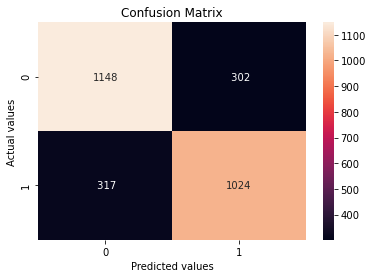

In [117]:
knn.fit(Xtrain, ytrain)

pred_test2 = knn.predict_proba(Xtest)[:,1]

classes2 = pred_test2 > 0.5

conf_mx2 = confusion_matrix(ytest, classes2)
sb.heatmap(conf_mx2,annot=True,fmt='4.0f')
plt.title('Confusion Matrix', size = 12)
plt.xlabel ('Predicted values')
plt.ylabel ('Actual values')
conf_mx2

In [118]:
from sklearn.metrics import recall_score

recall_score(ytest, classes2)

0.7636092468307233

In [119]:
from sklearn.metrics import precision_score

precision_score(ytest, classes2)

0.7722473604826546

In [120]:
from sklearn.metrics import f1_score

f1_score(ytest, classes2)

0.7679040119985001